In [6]:
import csv
from datetime import datetime

filename = 'sitka_weather_2014.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
#     for index, column_header in enumerate(header_row):
#         print(index, column_header)
    dates, highs, lows = [], [], []
    for row in reader:
        current_date = datetime.strptime(row[0], "%Y-%m-%d")
        dates.append(current_date)
        
        high = int(row[1])
        highs.append(high)
        low = int(row[2])
        lows.append(low)

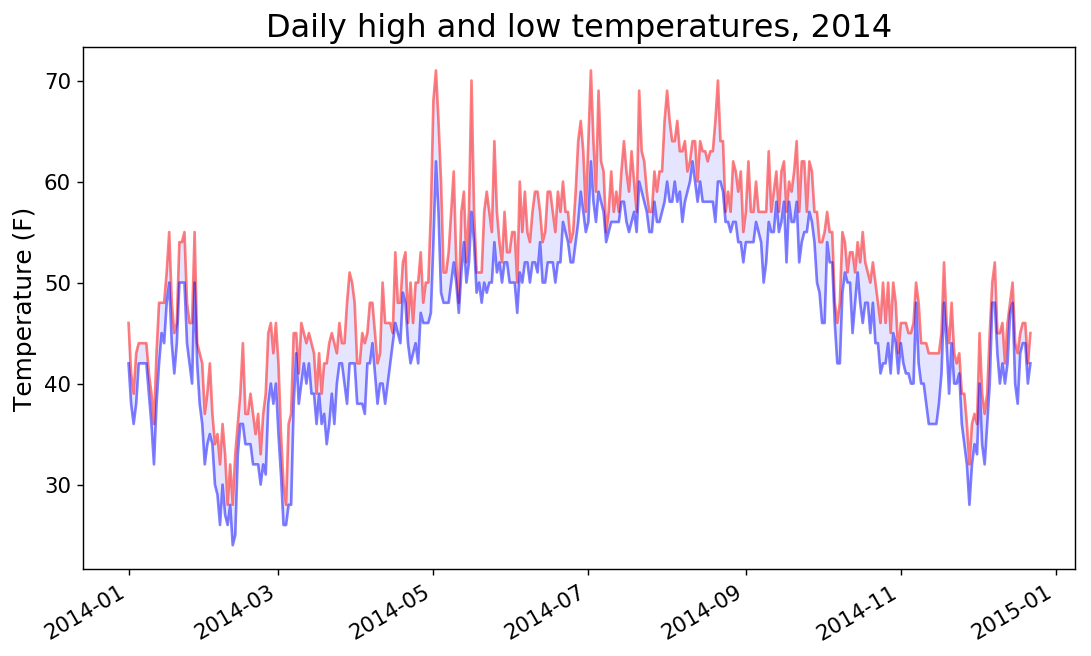

In [7]:
from matplotlib import pyplot as plt

fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(dates, highs, c='red', alpha = 0.5)
plt.plot(dates, lows, c='blue', alpha = 0.5)
plt.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)
plt.title("Daily high and low temperatures, 2014", fontsize=18)
plt.xlabel('', fontsize=14)
fig.autofmt_xdate()
plt.ylabel("Temperature (F)", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [8]:
# Get dates, high and low temperatures from file.
filename = 'death_valley_2014.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    dates, highs, lows = [], [], []
    for row in reader:
        try:
            current_date = datetime.strptime(row[0], "%Y-%m-%d")
            high = int(row[1])
            low = int(row[3])
        except ValueError:
            print(current_date, 'missing data')
        else:
            dates.append(current_date)
            highs.append(high)
            lows.append(low)

2014-02-16 00:00:00 missing data


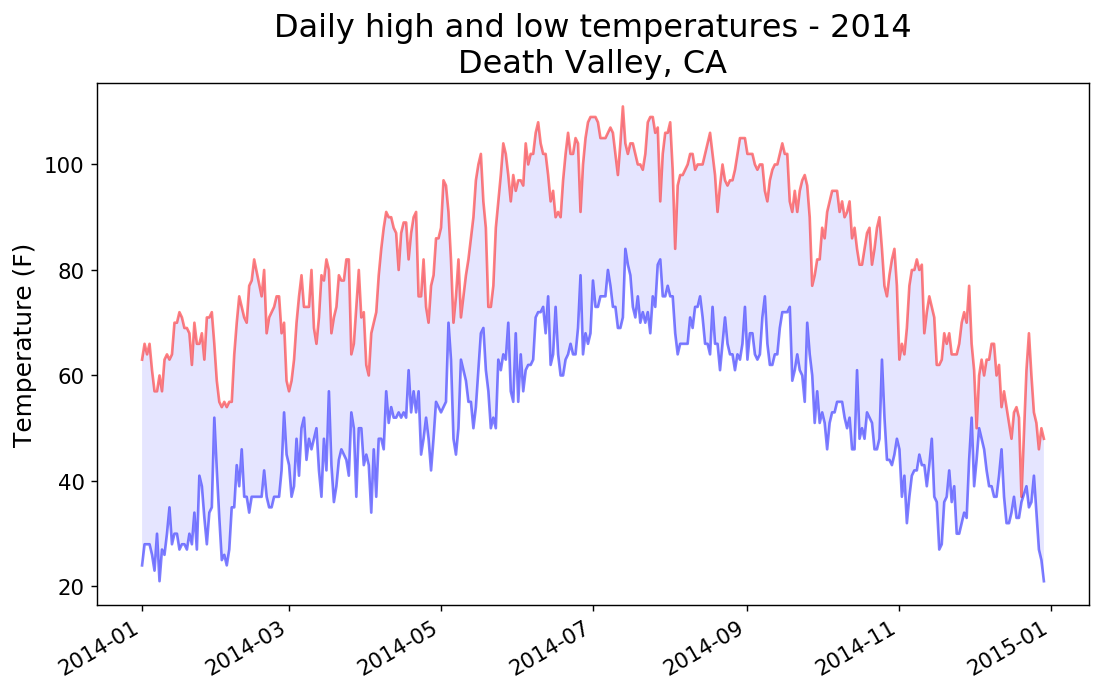

In [9]:
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(dates, highs, c='red', alpha = 0.5)
plt.plot(dates, lows, c='blue', alpha = 0.5)
plt.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)
plt.title("Daily high and low temperatures - 2014\nDeath Valley, CA", fontsize=18)
plt.xlabel('', fontsize=14)
fig.autofmt_xdate()
plt.ylabel("Temperature (F)", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [25]:
from pygal_maps_world import maps

wm = maps.World()
wm.title = 'Some countries'
wm.add('F countries', ['fr', 'fi'])
wm.add('M countries', ['ma', 'mc', 'md', 'me', 'mg',
                                   'mk', 'ml', 'mm', 'mn', 'mo',
                                   'mr', 'mt', 'mu', 'mv', 'mw',
                                   'mx', 'my', 'mz'])
wm.add('U countries', ['ua', 'ug', 'us', 'uy', 'uz'])

wm.render_to_file('some_countries.svg')

In [23]:
worldmap = maps.World()
worldmap.title = 'Minimum deaths by capital punishement (source: Amnesty International)'
worldmap.add('In 2012', {
  'af': 14, 'bd': 1, 'by': 3, 'cn': 1000, 'gm': 9, 'in': 1, 'ir': 314,
  'iq': 129, 'jp': 7, 'kp': 6, 'pk': 1, 'ps': 6, 'sa': 79, 'so': 6,
  'sd': 5, 'tw': 6, 'ae': 1, 'us': 43, 'ye': 28
})
worldmap.render_to_file('deaths.svg')

In [55]:
"""Population Data"""
import json
from pygal_maps_world.i18n import COUNTRIES as cns
from pygal_maps_world import maps
from pygal.style import Style

def get_country_code(country_name):
    """Return the Pygal 2-digit country code for the given country."""
    for code, name in cns.items():
        if name == country_name:
            return code
    return None
    
filename = 'population_data.json'
with open(filename) as f:
    pop_data = json.load(f)

cc_population = {}
for pop_dict in pop_data:
    if pop_dict['Year'] == '2010':
        country_name = pop_dict['Country Name']
        population = int(float(pop_dict['Value']))
        code = get_country_code(country_name)
        if(code):
            cc_population[code] = population

# Separate countries in three groups by population qty
cc_pops_1, cc_pops_2, cc_pops_3 = {}, {}, {}
for cc, pop in cc_population.items():
    if int(pop) < 10000000:
        cc_pops_1[cc] = int(pop)
    elif pop < 1000000000:
        cc_pops_2[cc] = int(pop)
    else:
        cc_pops_3[cc] = int(pop)
     
wm_stype = Style( background='transparent',
  plot_background='transparent',
  foreground='#53E89B',
  foreground_strong='#53A0E8',
  foreground_subtle='#630C0D',
  opacity='.6',
  opacity_hover='.9',
  transition='400ms ease-in',
  colors=('#4630fc', '#79ca25', '#f85925', '#ff012f'))

pwm = maps.World(style=wm_stype)
pwm.title = 'World Population in 2010, by Country'
pwm.add('0-10m', cc_pops_1)
pwm.add('10m-1bn', cc_pops_2)
pwm.add('>1bn', cc_pops_3)

pwm.render_to_file('world_population_2010.svg')


In [57]:
filename = 'gdp_json.json'
with open(filename) as f:
    gdp = json.load(f)

cc_gdp = {}
for gdp_dict in gdp:
    if gdp_dict['Year'] == 2016:
        country_name = gdp_dict['Country Name']
        gdp_amount = int(float(gdp_dict['Value']))
        code = get_country_code(country_name)
        if(code):
            cc_gdp[code] = gdp_amount

# Separate countries in four groups by GDP amount
cc_gdp_1, cc_gdp_2, cc_gdp_3, cc_gdp_4 = {}, {}, {}, {}
for cc, gdp in cc_gdp.items():
    if int(gdp) < 10000000000:
        cc_gdp_1[cc] = int(gdp)
    elif gdp < 50000000000:
        cc_gdp_2[cc] = int(gdp)
    elif gdp < 100000000000:
        cc_gdp_3[cc] = int(gdp)
    else:
        cc_gdp_4[cc] = int(gdp)

pwm = maps.World(style=wm_stype)
pwm.title = 'World GDP in 2018, by Country'
pwm.add('0-10bn', cc_gdp_1)
pwm.add('10bn-50bn', cc_gdp_2)
pwm.add('50bn-100bn', cc_gdp_3)
pwm.add('>100bn', cc_gdp_4)

pwm.render_to_file('world_gdp_2018.svg')